In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/HI/Desktop/mk/adultclassifier/nudedata/train',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6342 files belonging to 2 classes.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/HI/Desktop/mk/adultclassifier/nudedata/val',
  
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1586 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['nude', 'safe']


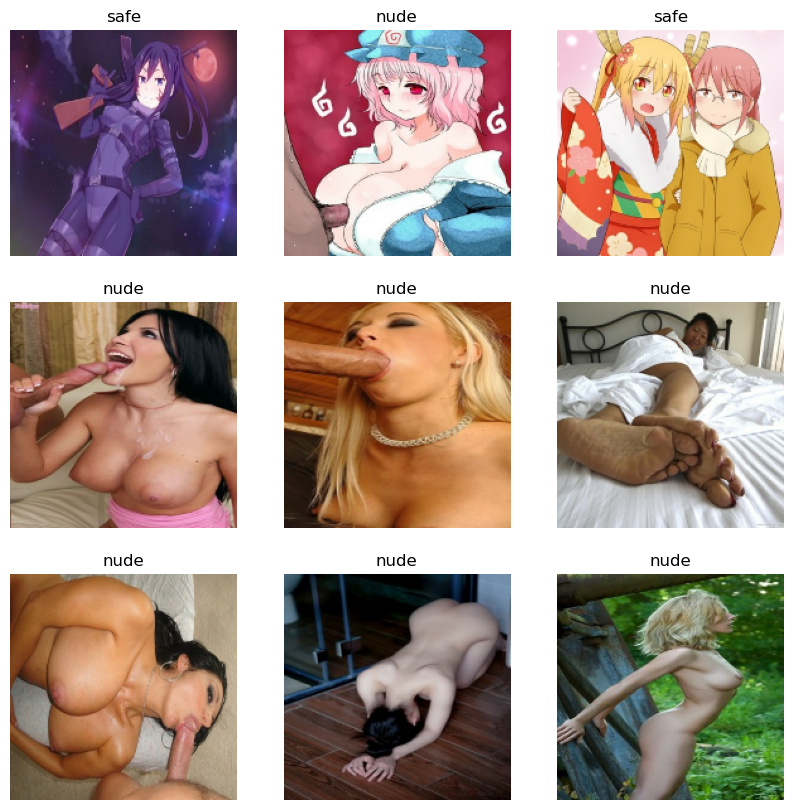

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
199/199 [==============================] - 186s 913ms/step - loss: 0.6665 - accuracy: 0.6539 - val_loss: 0.5690 - val_accuracy: 0.7106
Epoch 2/10
199/199 [==============================] - 183s 918ms/step - loss: 0.5285 - accuracy: 0.7420 - val_loss: 0.5447 - val_accuracy: 0.7352
Epoch 3/10
199/199 [==============================] - 189s 950ms/step - loss: 0.4767 - accuracy: 0.7699 - val_loss: 0.4972 - val_accuracy: 0.7566
Epoch 4/10
199/199 [==============================] - 150s 756ms/step - loss: 0.4319 - accuracy: 0.8054 - val_loss: 0.5342 - val_accuracy: 0.7541
Epoch 5/10
199/199 [==============================] - 95s 476ms/step - loss: 0.3775 - accuracy: 0.8327 - val_loss: 0.4910 - val_accuracy: 0.7793
Epoch 6/10
199/199 [==============================] - 92s 460ms/step - loss: 0.2781 - accuracy: 0.8819 - val_loss: 0.5521 - val_accuracy: 0.7579
Epoch 7/10
199/199 [==============================] - 91s 458ms/step - loss: 0.2027 - accuracy: 0.9155 - val_loss: 0.7188 - va

In [15]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 92ms/step
This image most likely belongs to nude with a 94.41 percent confidence.


In [16]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult3.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to nude with a 99.73 percent confidence.


In [17]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult5.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to safe with a 82.67 percent confidence.


In [19]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/nadult.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 53ms/step
This image most likely belongs to nude with a 99.62 percent confidence.


In [20]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/safe4.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 36ms/step
This image most likely belongs to safe with a 99.99 percent confidence.


In [22]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/download4.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 39ms/step
This image most likely belongs to nude with a 96.29 percent confidence.


In [23]:
img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/nude2.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to safe with a 93.79 percent confidence.


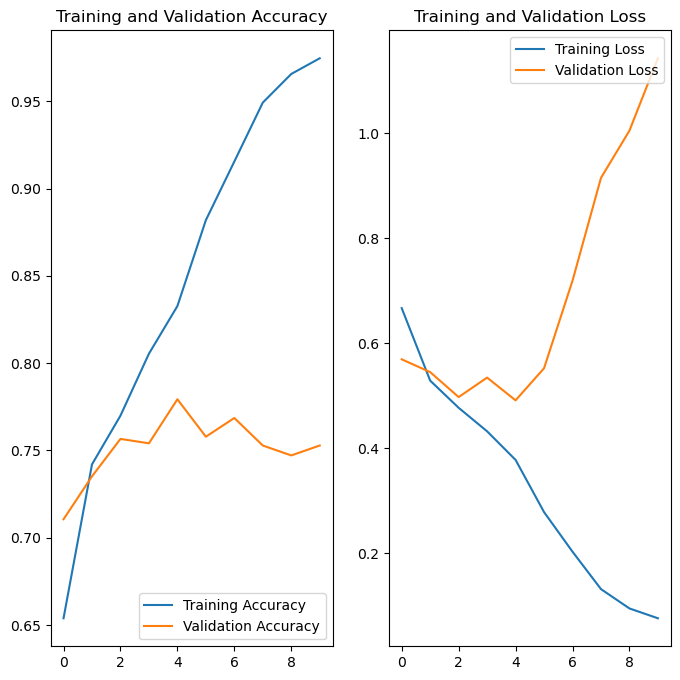

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

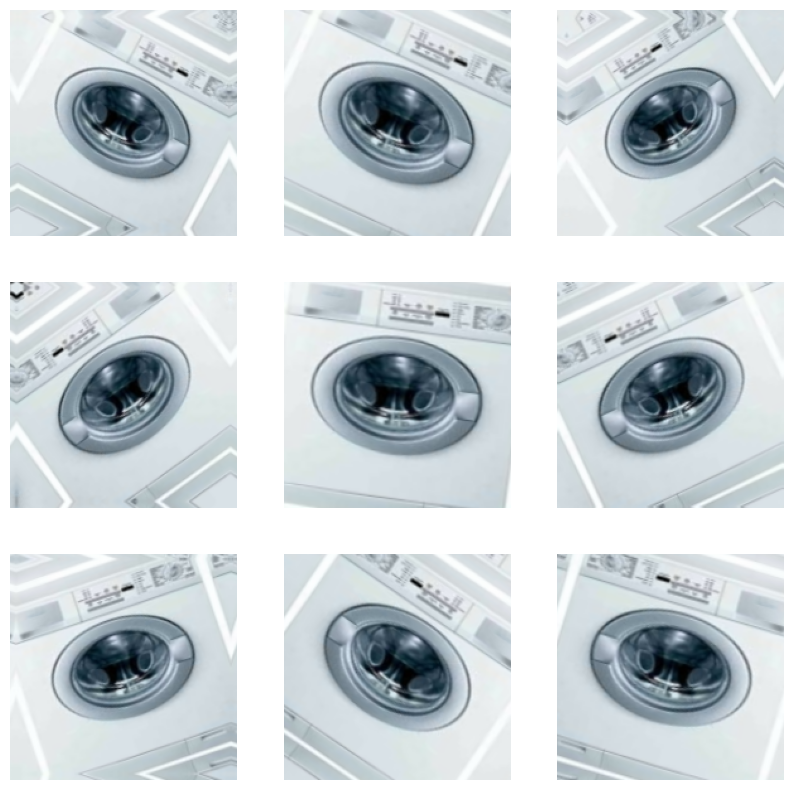

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss=tf.keras.losses.binary_crossentropy(from_logits=False)
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [34]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
199/199 [==============================] - 108s 534ms/step - loss: 0.6687 - accuracy: 0.6563 - val_loss: 0.5307 - val_accuracy: 0.7327
Epoch 2/15
199/199 [==============================] - 109s 546ms/step - loss: 0.5580 - accuracy: 0.7219 - val_loss: 0.5241 - val_accuracy: 0.7421
Epoch 3/15
199/199 [==============================] - 105s 528ms/step - loss: 0.5210 - accuracy: 0.7466 - val_loss: 0.5068 - val_accuracy: 0.7629
Epoch 4/15
199/199 [==============================] - 106s 534ms/step - loss: 0.5057 - accuracy: 0.7556 - val_loss: 0.4772 - val_accuracy: 0.7654
Epoch 5/15
199/199 [==============================] - 108s 541ms/step - loss: 0.5074 - accuracy: 0.7562 - val_loss: 0.4792 - val_accuracy: 0.7667
Epoch 6/15
199/199 [==============================] - 108s 544ms/step - loss: 0.4849 - accuracy: 0.7709 - val_loss: 0.4787 - val_accuracy: 0.7888
Epoch 7/15
199/199 [==============================] - 108s 543ms/step - loss: 0.4740 - accuracy: 0.7717 - val_loss: 0.4515 -

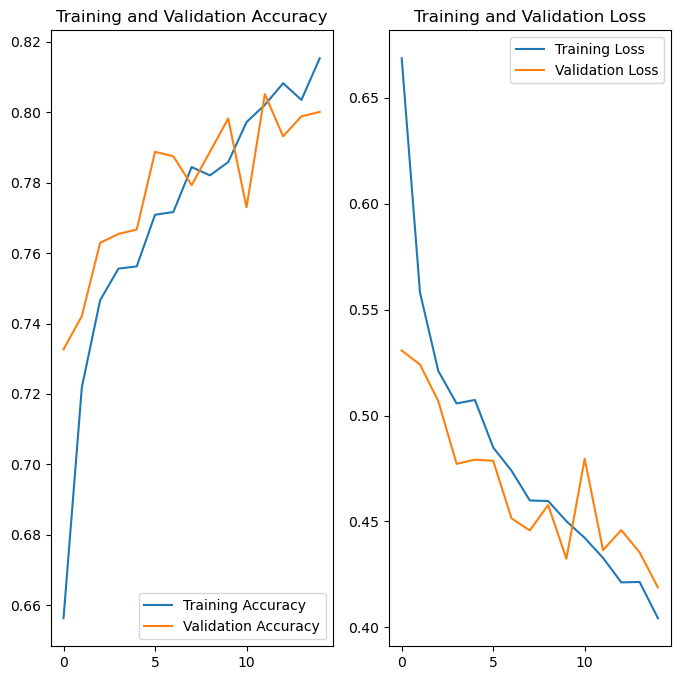

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/nude2.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 78ms/step
This image most likely belongs to nude with a 90.13 percent confidence.


In [37]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 43ms/step
This image most likely belongs to nude with a 97.24 percent confidence.


In [38]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult3.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 18ms/step
This image most likely belongs to nude with a 97.00 percent confidence.


In [39]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult4.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to nude with a 84.72 percent confidence.


In [40]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/adult6.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 31ms/step
This image most likely belongs to nude with a 98.70 percent confidence.


In [41]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/safe3.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 34ms/step
This image most likely belongs to safe with a 55.99 percent confidence.


In [42]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/safe4.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to safe with a 53.18 percent confidence.


In [43]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/downloa.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 52ms/step
This image most likely belongs to safe with a 59.29 percent confidence.


In [44]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/adultclassifier/adult/safe6.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 22ms/step
This image most likely belongs to safe with a 53.47 percent confidence.


In [45]:
import os

In [46]:
directory = "C:/Users/HI/Desktop/mk/tfimagenude"
name = 'tfimagenude.h5'
path = os.path.join(directory, name)
model.save(path)
print('Saved trained model at %s ' % path)

Saved trained model at C:/Users/HI/Desktop/mk/tfimagenude\tfimagenude.h5 


In [47]:
loss, accuracy = model.evaluate(val_ds)
print(f"accuracy: {accuracy * 100:.2f}%")

50/50 [==============================] - 4s 85ms/step - loss: 0.4189 - accuracy: 0.8001
accuracy: 80.01%


In [48]:
from keras.callbacks import ModelCheckpoint

In [67]:
cp_checkpoint = ModelCheckpoint("weights", 
                                save_weights_only=True,
                                verbose=1)

model.fit(x=train_ds,
          validation_data=(val_ds), 
          epochs=10,
          callbacks=[cp_checkpoint])

Epoch 1/10
199/199 [==============================] - ETA: 0s - loss: 0.2818 - accuracy: 0.8770
Epoch 1: saving model to weights
199/199 [==============================] - 330s 2s/step - loss: 0.2818 - accuracy: 0.8770 - val_loss: 0.4381 - val_accuracy: 0.8342
Epoch 2/10
199/199 [==============================] - ETA: 0s - loss: 0.2812 - accuracy: 0.8827
Epoch 2: saving model to weights
199/199 [==============================] - 233s 1s/step - loss: 0.2812 - accuracy: 0.8827 - val_loss: 0.4974 - val_accuracy: 0.7989
Epoch 3/10
199/199 [==============================] - ETA: 0s - loss: 0.2800 - accuracy: 0.8748
Epoch 3: saving model to weights
199/199 [==============================] - 232s 1s/step - loss: 0.2800 - accuracy: 0.8748 - val_loss: 0.4626 - val_accuracy: 0.8178
Epoch 4/10
199/199 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.8838
Epoch 4: saving model to weights
199/199 [==============================] - 228s 1s/step - loss: 0.2700 - accuracy: 0.883

In [81]:

img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/images.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 594ms/step
This image most likely belongs to nude with a 97.85 percent confidence.


In [82]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/download.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 246ms/step
This image most likely belongs to nude with a 84.21 percent confidence.


In [84]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/download2.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 317ms/step
This image most likely belongs to nude with a 98.25 percent confidence.


In [86]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/images2.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 150ms/step
This image most likely belongs to safe with a 66.50 percent confidence.


In [87]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/download3.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 192ms/step
This image most likely belongs to nude with a 62.84 percent confidence.


In [88]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/safe.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 231ms/step
This image most likely belongs to nude with a 69.79 percent confidence.


In [89]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/safe2.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 126ms/step
This image most likely belongs to nude with a 79.19 percent confidence.


In [90]:


img = tf.keras.utils.load_img(
    'C:/Users/HI/Desktop/mk/nudeimages/safe3.jpg', target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 266ms/step
This image most likely belongs to nude with a 66.86 percent confidence.
